<a href="https://colab.research.google.com/github/AshSama12/Sinhala-Spell-and-Grammer-Checker/blob/master/MachineLearning_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/Sample/correct incorrect sentences.csv'
df = pd.read_csv(file_path)


In [ ]:
import nltk
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
# Ensure you have NLTK resources
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
print(df.columns)


Index(['Correct Sentences', 'Incorrect Sentences', 'Incorrect Sentences.1'], dtype='object')


In [ ]:
# Correctly reference the columns
correct_sentences = df['Correct Sentences']
incorrect_sentences_grammar1 = df['Incorrect Sentences']
incorrect_sentences_grammar2 = df['Incorrect Sentences.1']


In [ ]:
print(df.columns.str.strip())


Index(['Correct Sentences', 'Incorrect Sentences', 'Incorrect Sentences.1'], dtype='object')


In [ ]:
# Combine incorrect sentences into one list
incorrect_sentences = incorrect_sentences_grammar1.tolist() + incorrect_sentences_grammar2.tolist()
correct_sentences = correct_sentences.tolist() * 2  # Duplicate correct sentences to match incorrect ones


In [ ]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(correct_sentences + incorrect_sentences)


In [ ]:
import nltk
nltk.download('punkt')  # For word tokenization
nltk.download('punkt_tab')  # If punkt_tab is specifically needed

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Encode and pad sequences
max_len = max([len(nltk.word_tokenize(sentence)) for sentence in correct_sentences + incorrect_sentences])
correct_sequences = tokenizer.texts_to_sequences(correct_sentences)
incorrect_sequences = tokenizer.texts_to_sequences(incorrect_sentences)
correct_sequences = pad_sequences(correct_sequences, maxlen=max_len, padding='post')
incorrect_sequences = pad_sequences(incorrect_sequences, maxlen=max_len, padding='post')


In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(incorrect_sequences, correct_sequences, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, TimeDistributed

# Parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
lstm_units = 256

In [ ]:
# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(lstm_units, return_sequences=True)),
    TimeDistributed(Dense(vocab_size, activation='softmax'))
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y_train = np.expand_dims(y_train, axis=-1)  # Ensure it's a column vector
y_test = np.expand_dims(y_test, axis=-1)  # Same for the test set


In [ ]:
input_size = 5000  # Size of vocabulary or feature vector length
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(input_size,)))
model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])





/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(input_size,)))
model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

# Define the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))  # Embedding layer with vocab size and max length
model.add(LSTM(128, return_sequences=False))
model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes (adjust based on your task)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Check the shape of your input data and labels
print("Shape of X_train:", correct_sequences.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (2442, 13)
Shape of y_train: (1953, 13, 1, 1, 1, 1, 1)


In [ ]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
incorrect_sentences = incorrect_sentences_grammar1.tolist() + incorrect_sentences_grammar2.tolist()
X_train, X_test, y_train, y_test = train_test_split(incorrect_sequences, correct_sequences, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)  # Changed to X_train
print("Shape of y_train:", y_train.shape)

assert len(X_train) == len(y_train), "Number of input samples and labels don't match!"  # Changed to X_train

Shape of X_train: (1953, 13)
Shape of y_train: (1953, 13)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2403 - loss: 4987.4971 - val_accuracy: 0.2924 - val_loss: 5405.7075
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2419 - loss: 6608.1724 - val_accuracy: 0.2924 - val_loss: 6345.4082
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2448 - loss: 7055.1196 - val_accuracy: 0.2924 - val_loss: 6988.6265
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2395 - loss: 8199.0479 - val_accuracy: 0.2924 - val_loss: 7804.3931
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2474 - loss: 9103.9326 - val_accuracy: 0.2924 - val_loss: 8512.4150
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2547 - loss: 9266.7646 - val_accuracy: 0.2924 - val_loss: 9106.2217
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2643 - loss: 9821.4238 - val_accuracy: 0.2924 - val_loss: 9905.5625
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2597 - loss

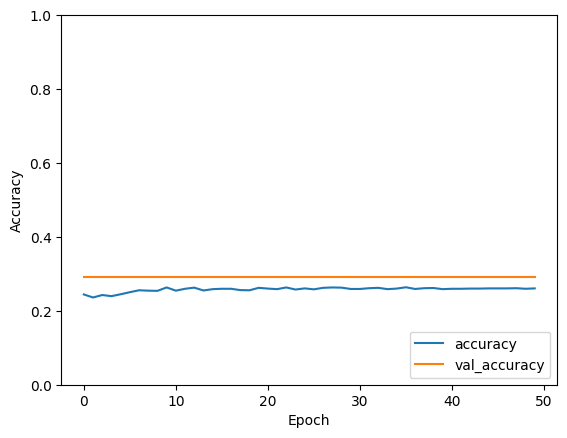

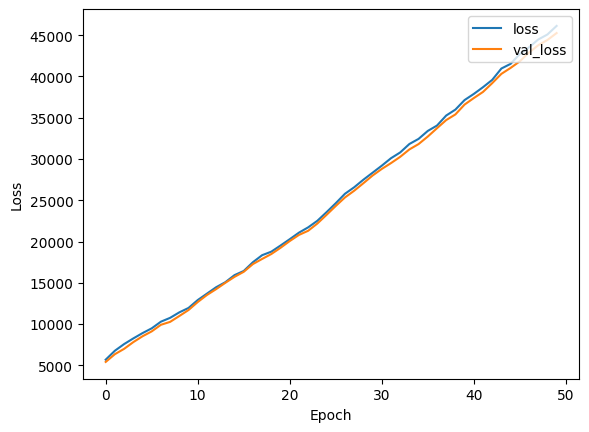

In [ ]:
# Assuming you have 13 distinct classes
model = Sequential()

# Add the embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=128,
                    input_length=X_train.shape[1]))  # X_train.shape[1] is the maximum length

# Add LSTM layer
model.add(LSTM(128, return_sequences=False))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer with 13 units (as per your target labels)
model.add(Dense(13, activation='softmax'))  # For 13 categories

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Optionally, you can plot the training history (accuracy and loss)
import matplotlib.pyplot as plt

# Plot the accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot the loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3139 - loss: 44870.2695
Test loss: 45263.55078125
Test accuracy: 0.2924335300922394


In [ ]:
# Make predictions
predictions = model.predict(X_test)

# You can decode predictions and map to the class labels
predicted_classes = np.argmax(predictions, axis=1)

# Example: print first 10 predictions
print(predicted_classes[:10])


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[2 2 2 2 2 2 2 2 2 2]


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2607 - loss: 49663.2930 - val_accuracy: 0.2924 - val_loss: 46342.8125
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2553 - loss: 51103.8477 - val_accuracy: 0.2924 - val_loss: 47564.6328
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2500 - loss: 50872.3711 - val_accuracy: 0.2924 - val_loss: 48697.3203
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2597 - loss: 49120.7773 - val_accuracy: 0.2924 - val_loss: 49085.5781
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2499 - loss: 49085.8320 - val_accuracy: 0.2924 - val_loss: 49668.7539
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2670 - loss: 53345.1523 - val_accuracy: 0.2924 - val_loss: 50498.1562


In [ ]:
def correct_sentence(input_sentence):
    # Tokenize and pad the input sentence
    tokenized_input = tokenizer.texts_to_sequences([input_sentence])
    padded_input = pad_sequences(tokenized_input, maxlen=max_len, padding='post')

    # Predict the corrected sentence
    prediction = model.predict(padded_input)

    # Debugging: Check the shape and content of prediction
    print("Prediction shape:", prediction.shape)
    print("Prediction output:", prediction)

    # Get the predicted sequence (make sure it's the correct output shape)
    predicted_sequence = np.argmax(prediction, axis=-1)

    # If predicted_sequence is a single value (integer), adjust the logic
    if isinstance(predicted_sequence[0], np.int64):
        predicted_sequence = [predicted_sequence]

    # Convert the predicted sequence into words using the tokenizer
    corrected_sentence = ' '.join([tokenizer.index_word.get(idx, '') for idx in predicted_sequence[0]])

    return corrected_sentence.strip()

# Example interactive user input
while True:
    input_paragraph = input("Enter a sentence to correct (or type 'exit' to quit): ")

    if input_paragraph.lower() == 'exit':
        break

    sentences = nltk.sent_tokenize(input_paragraph)

    # Correct each sentence
    corrected_paragraph = ' '.join([correct_sentence(sentence) for sentence in sentences])
    print("Corrected Sentence:", corrected_paragraph)


Enter a sentence to correct (or type 'exit' to quit): අපි තරු නරඹනවා


ValueError: Layer "functional_13" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'data:0' shape=(1, 20) dtype=int32>]

In [ ]:
def correct_sentence(input_sentence):
    # Tokenize and pad the input sentence
    tokenized_input = tokenizer.texts_to_sequences([input_sentence])
    padded_input = pad_sequences(tokenized_input, maxlen=max_len, padding='post')

    # Create a dummy input for the second input (replace with your actual data if needed)
    dummy_input = np.zeros(padded_input.shape)

    # Predict the corrected sentence
    prediction = model.predict([padded_input, dummy_input])

    # Get the predicted sequence (with modifications)
    predicted_sequence = np.argmax(prediction[0], axis=-1) # Get the sequence from the first (and only) element of prediction

    # Convert the predicted sequence into words
    corrected_sentence = ' '.join([tokenizer.index_word.get(idx, '') for idx in predicted_sequence if idx != 0]) # Filter out padding (0)

    return corrected_sentence.strip()

# Example interactive user input
while True:
    input_paragraph = input("Enter a sentence to correct (or type 'exit' to quit): ")

    if input_paragraph.lower() == 'exit':
        break

    sentences = nltk.sent_tokenize(input_paragraph)  # Tokenize into sentences

    # Correct each sentence and join back into a paragraph
    corrected_paragraph = ' '.join([correct_sentence(sentence) for sentence in sentences])
    print("Corrected Sentence:", corrected_paragraph)

Enter a sentence to correct (or type 'exit' to quit): ඔබ උද්යානයේ දුවන්න.	
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Corrected Sentence: 
Enter a sentence to correct (or type 'exit' to quit): exit


In [ ]:
import numpy as np
import nltk
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer



# Assuming tokenizer and model are already defined, and max_len is determined
nltk.download('punkt')

def correct_sentence(input_sentence):
    # Tokenize and pad the input sentence
    tokenized_input = tokenizer.texts_to_sequences([input_sentence])
    padded_input = pad_sequences(tokenized_input, maxlen=max_len, padding='post')

    # Initialize the decoder input (start token)
    decoder_input_data = np.zeros((1, 1))  # Start with <start> token (e.g., tokenizer.word_index['<start>'])

    corrected_sentence = []

    # Predict the corrected sentence step-by-step (using the decoder)
    for _ in range(max_output_len):
        # Predict the next word using the current state
        prediction = model.predict([padded_input, decoder_input_data])

        # Get the predicted word index
        predicted_word_index = np.argmax(prediction[0, -1, :])
        predicted_word = tokenizer.index_word.get(predicted_word_index, '')

        # If we reach the <end> token or a blank, stop
        if predicted_word == '' or predicted_word == '<end>':
            break

        corrected_sentence.append(predicted_word)

        # Update the decoder input for the next step (add the predicted word)
        decoder_input_data = np.zeros((1, len(corrected_sentence)+1))
        decoder_input_data[0, -1] = predicted_word_index

    return ' '.join(corrected_sentence).strip()

# Example interactive user input
while True:
    input_paragraph = input("Enter a sentence to correct (or type 'exit' to quit): ")

    if input_paragraph.lower() == 'exit':
        break

    sentences = nltk.sent_tokenize(input_paragraph)  # Tokenize into sentences

    # Correct each sentence and join back into a paragraph
    corrected_paragraph = ' '.join([correct_sentence(sentence) for sentence in sentences])
    print("Corrected Sentence:", corrected_paragraph)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter a sentence to correct (or type 'exit' to quit): මම ප්‍රීතියෙන් සිනාසෙනවා.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Corrected Sentence: 
Enter a sentence to correct (or type 'exit' to quit): exit


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.tokenize import sent_tokenize

# Assuming 'model' and 'tokenizer' are already defined and loaded

# Define the maximum sequence length (adjust this based on your training data)
max_len = 50

def correct_sentence(input_sentence):
    # Tokenize and pad the input sentence
    tokenized_input = tokenizer.texts_to_sequences([input_sentence])
    padded_input = pad_sequences(tokenized_input, maxlen=max_len, padding='post')

    # Create a dummy input for the second input (replace with your actual data if needed)
    dummy_input = np.zeros(padded_input.shape)

    # Predict the corrected sentence
    prediction = model.predict([padded_input, dummy_input])

    # Check prediction to ensure it is correct
    print("Prediction:", prediction)  # Debugging output

    # Get the predicted sequence (with modifications)
    predicted_sequence = np.argmax(prediction[0], axis=-1)  # Get the sequence from the first (and only) element of prediction

    print("Predicted Sequence:", predicted_sequence)  # Check the predicted sequence

    # Convert the predicted sequence into words
    corrected_sentence = ' '.join([tokenizer.index_word.get(idx, '') for idx in predicted_sequence if idx != 0])  # Filter out padding (0)

    return corrected_sentence.strip()

# Example interactive user input
while True:
    input_paragraph = input("Enter a sentence to correct (or type 'exit' to quit): ")

    if input_paragraph.lower() == 'exit':
        break

    sentences = sent_tokenize(input_paragraph)  # Tokenize into sentences

    # Correct each sentence and join back into a paragraph
    corrected_paragraph = ' '.join([correct_sentence(sentence) for sentence in sentences])

    print("Corrected Sentence:", corrected_paragraph)


Enter a sentence to correct (or type 'exit' to quit): අපි කඳු නගිනවා.	


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Prediction: [[[0.00045993 0.00045562 0.00045738 ... 0.00045318 0.00045943 0.00045847]
  [0.00045988 0.0004559  0.00045726 ... 0.00045424 0.00045998 0.00045879]
  [0.00045986 0.00045627 0.0004571  ... 0.00045501 0.00046044 0.00045904]
  ...
  [0.00045911 0.0004591  0.00045612 ... 0.00045685 0.00046313 0.00045954]
  [0.00045911 0.0004591  0.00045612 ... 0.00045685 0.00046313 0.00045954]
  [0.00045911 0.0004591  0.00045612 ... 0.00045685 0.00046313 0.00045954]]]
Predicted Sequence: [920 157 157 157 157 157 157 157 157 157 157 157 157 157 157 157 157 157
 157 157 157 157 157 157 157 157 157 157 157 157 157 157 157 157 157 157
 157 157 157 157 157 157 157 157 157 157 157 157 157 157]
Corrected Sentence: 
Enter a sentence to correct (or type 'exit' to quit): exit


In [ ]:
!pip install fuzzywuzzy

from fuzzywuzzy import process

def correct_sinhala_sentence(sentence, sinhala_dictionary):
    """
    Corrects misspelled Sinhala words in a sentence.

    Args:
        sentence (str): The input sentence in Sinhala.
        sinhala_dictionary (list): A list of valid Sinhala words.

    Returns:
        str: The corrected sentence.
    """
    words = sentence.split()
    corrected_words = []

    for word in words:
        # Find the closest match for each word in the Sinhala dictionary
        best_match, score = process.extractOne(word, sinhala_dictionary)
        if score > 80:  # Adjust threshold for best accuracy
            corrected_words.append(best_match)
        else:
            corrected_words.append(word)  # Keep the original word if no match is found

    corrected_sentence = " ".join(corrected_words)
    return corrected_sentence

# Example usage
sinhala_dictionary = ["විශ්වවිද්‍යාලය", "සිසු", "ඉංජිනේරු", "පරිගණක", "විද්‍යාව", "ශිෂ්‍යයා", "කෘත්‍රිම", "බුද්ධිය"]
sentence = "විශ්වවිද්යාලයෙ සිසු ඉංජිනෙරු පරිගනක විද්‍යාව"

corrected = correct_sinhala_sentence(sentence, sinhala_dictionary)
print("Original Sentence:", sentence)
print("Corrected Sentence:", corrected)


Original Sentence: විශ්වවිද්යාලයෙ සිසු ඉංජිනෙරු පරිගනක විද්‍යාව
Corrected Sentence: විශ්වවිද්‍යාලය සිසු ඉංජිනේරු පරිගණක විද්‍යාව


In [ ]:
from fuzzywuzzy import process

def correct_sinhala_sentence(sentence, sinhala_dictionary):
    """
    Corrects misspelled Sinhala words in a sentence.

    Args:
        sentence (str): The input sentence in Sinhala.
        sinhala_dictionary (list): A list of valid Sinhala words.

    Returns:
        str: The corrected sentence.
    """
    words = sentence.split()
    corrected_words = []

    for word in words:
        # Find the closest match for each word in the Sinhala dictionary
        best_match, score = process.extractOne(word, sinhala_dictionary)
        if score > 80:  # Adjust threshold for best accuracy
            corrected_words.append(best_match)
        else:
            corrected_words.append(word)  # Keep the original word if no match is found

    corrected_sentence = " ".join(corrected_words)
    return corrected_sentence


# Sinhala dictionary
sinhala_dictionary = ["විශ්වවිද්‍යාලය", "සිසු", "ඉංජිනේරු", "පරිගණක", "විද්‍යාව", "ශිෂ්‍යයා", "කෘත්‍රිම", "බුද්ධිය"]

# User Input
sentence = input("Enter a Sinhala sentence: ")

# Correct and Display Output
corrected = correct_sinhala_sentence(sentence, sinhala_dictionary)
print("Corrected Sentence:", corrected)


Enter a Sinhala sentence: ඔබ උද්යානයේ දුවන්න.	
Corrected Sentence: ඔබ විශ්වවිද්‍යාලය විශ්වවිද්‍යාලය


In [ ]:
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Load your trained model and tokenizer
# Replace 'your-model-name' with the correct path or name of your model and tokenizer
model_name = "your-model-name"  # Replace with the trained model name or path
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

def correct_grammar_with_model(sentence):
    """
    Corrects grammar using the pre-trained model.

    Args:
        sentence (str): Input Sinhala sentence.

    Returns:
        str: Grammatically corrected Sinhala sentence.
    """
    # Tokenize the input sentence
    input_data = tokenizer(sentence, return_tensors="pt")

    # Generate corrected output using the trained model
    with torch.no_grad():
        output = model.generate(input_data["input_ids"])

    # Decode the output into a human-readable sentence
    corrected_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return corrected_sentence


# User Input
sentence = input("Enter a Sinhala sentence for grammar correction: ")

# Correct and Display Output
try:
    corrected_sentence = correct_grammar_with_model(sentence)
    print("Corrected Sentence:", corrected_sentence)
except Exception as e:
    print("An error occurred:", e)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


OSError: your-model-name is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`